In [1]:
import matplotlib.pyplot as plt
import h5py as h5py
import numpy as np
import math

In [2]:
def signal(filename):
    with h5py.File(filename, 'r') as h5file:
        reads = h5file['Reads'].values()
        for x in reads:
            yield list(x['Dacs'][()])
            
def unzip(original):
    return [ a for a,b in original ], [ b for a,b in original ]

def normalise(dac, dmin, dmax, bound_b=True):
    return [(bound(d, dmin, dmax, bound_b)-dmin)/(dmax-dmin) for d in dac]

def bound(val, dmin, dmax, bound=True):
    if not bound:
        return val
    if val < dmin:
        return dmin
    if val > dmax:
        return dmax
    return val

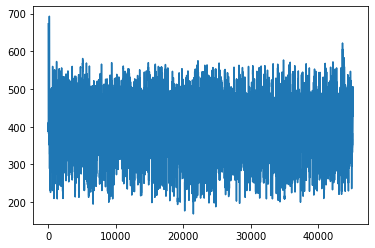

In [3]:
for x in signal("/mnt/sdb/taiyaki_mapped/mapped_umi16to9.hdf5"):
    plt.plot(x)
    plt.show()
    break
    a = input("press for next")

Reading first 100 signals and sorting them

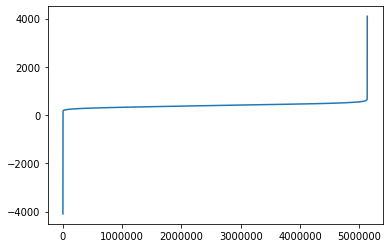

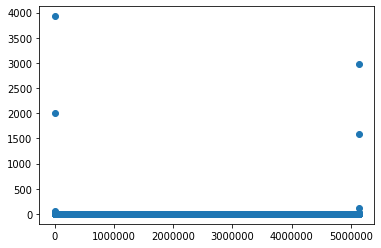

In [4]:
i = 0
lst = []
for x in signal("/mnt/sdb/taiyaki_mapped/mapped_umi16to9.hdf5"):
    i += 1
    if i > 100:
        break
    lst += x

lst.sort()
gradients = np.gradient(lst)
plt.plot(lst)
plt.show()
plt.plot(gradients, 'o')
plt.show()

Cutting of outliers based on gradient

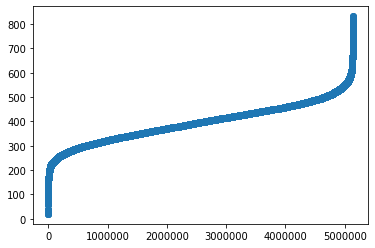

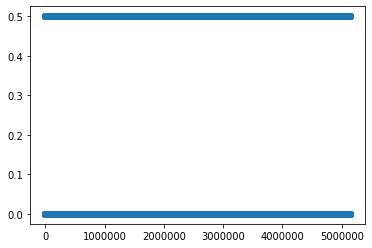

In [5]:
combined = zip(lst, gradients)
combined_cut = [(a,b) for (a, b) in combined if b < 1]
lst_cut, gradient_cut = unzip(combined_cut)
plt.plot(lst_cut, 'o')
plt.show()
plt.plot(gradient_cut, 'o')
plt.show()

In [6]:
print(f'Min: {lst_cut[0]}\nMax: {lst_cut[-1]}')

Min: 20
Max: 832


# Histogram of values

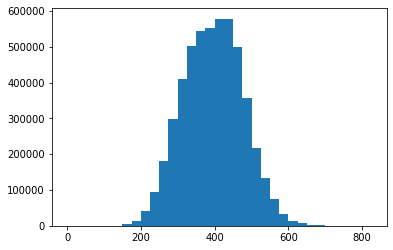

In [7]:
bins = range(0,850,25)
plt.hist(lst_cut, bins=bins)
plt.show()

# Normalize

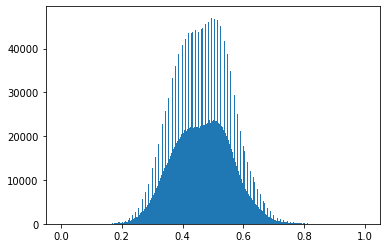

Min: 0.0
Max: 1.0


In [8]:
norm = normalise(lst, dmin=0, dmax=850)
plt.hist(norm, bins='auto')
plt.show()
print(f'Min: {norm[0]}\nMax: {norm[-1]}')

# Standardize
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

**Including outliers**

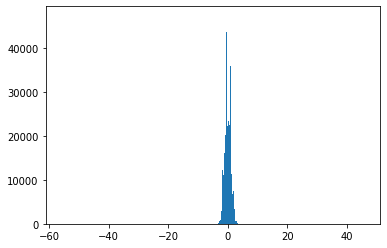

Min: -56.08263531346199
Max: 46.19846863207136


In [9]:
mean = np.mean(lst)
std = np.std(lst)
standalized = (lst - mean) / std
plt.hist(standalized, bins='auto')
plt.show()
print(f'Min: {standalized[0]}\nMax: {standalized[-1]}')

**... and with outliers bounded to min/max**

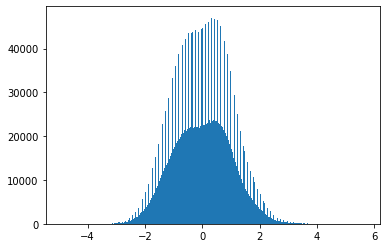

Min: -4.938430540173102
Max: 5.681095389876332
Mean: 395.278093089754
Std: 80.04123777265858


In [10]:
bounded = [bound(val, dmin=0, dmax=850) for val in lst]
mean = np.mean(bounded)
std = np.std(bounded)
standalized = (bounded - mean) / std
plt.hist(standalized, bins='auto')
plt.show()
print(f'Min: {standalized[0]}\nMax: {standalized[-1]}')
print(f'Mean: {mean}\nStd: {std}')